<a href="https://colab.research.google.com/github/talha-jobaer/210118.Decision_Tree_Practice/blob/main/210118_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
GITHUB_RAW_URL = "https://raw.githubusercontent.com/talha-jobaer/Decision_Tree_Practice/main/data.csv"


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, confusion_matrix
)
from sklearn.decomposition import PCA


In [ ]:
GITHUB_RAW_URL = "https://raw.githubusercontent.com/talha-jobaer/Decision_Tree_Practice/main/data.csv"
df = pd.read_csv(GITHUB_RAW_URL)
print("Dataset loaded successfully")
print(df.shape)
df.head()


Dataset loaded successfully
(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
print(df.columns)
print(df.dtypes)
print(df.isnull().sum())


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean 

In [ ]:
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]
# Encode Diagnosis: M=1, B=0
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})
print(df["diagnosis"].value_counts())


diagnosis
0    357
1    212
Name: count, dtype: int64


In [ ]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (455, 31) Test: (114, 31)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
cart = DecisionTreeClassifier(criterion="gini", random_state=42)

param_grid = {
    "max_depth": [2, 4, 6, 8, 10],
    "min_samples_split": [2, 5, 10]
}
grid_cart = GridSearchCV(
    cart, param_grid, cv=5, scoring="roc_auc", n_jobs=-1
)
grid_cart.fit(X_train_scaled, y_train)

best_cart = grid_cart.best_estimator_
print("Best CART params:", grid_cart.best_params_)


Best CART params: {'max_depth': 2, 'min_samples_split': 2}


In [ ]:
id3 = DecisionTreeClassifier(criterion="entropy", random_state=42)
grid_id3 = GridSearchCV(
    id3, param_grid, cv=5, scoring="roc_auc", n_jobs=-1
)
grid_id3.fit(X_train_scaled, y_train)

best_id3 = grid_id3.best_estimator_
print("Best ID3 params:", grid_id3.best_params_)


Best ID3 params: {'max_depth': 6, 'min_samples_split': 10}


In [ ]:
cart_pred = best_cart.predict(X_test_scaled)
cart_prob = best_cart.predict_proba(X_test_scaled)[:, 1]

id3_pred = best_id3.predict(X_test_scaled)
id3_prob = best_id3.predict_proba(X_test_scaled)[:, 1]


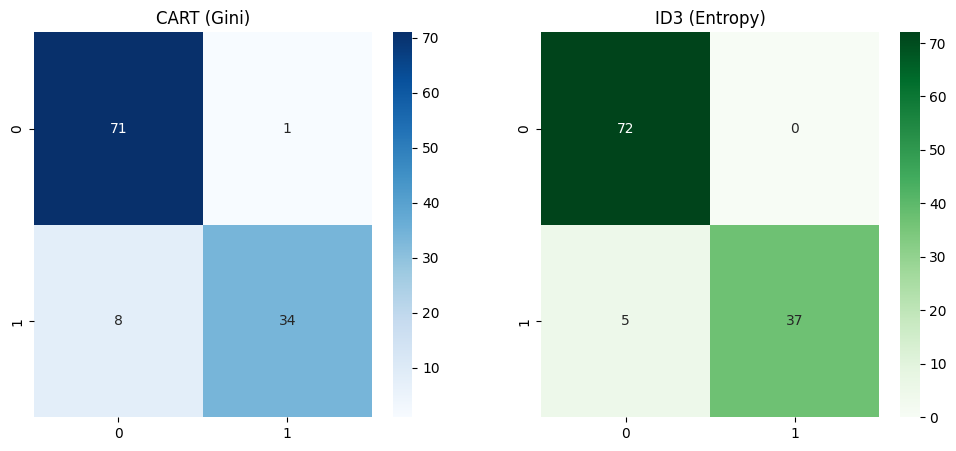

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.heatmap(confusion_matrix(y_test, cart_pred),
            annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("CART (Gini)")

sns.heatmap(confusion_matrix(y_test, id3_pred),
            annot=True, fmt="d", cmap="Greens", ax=ax[1])
ax[1].set_title("ID3 (Entropy)")

plt.show()


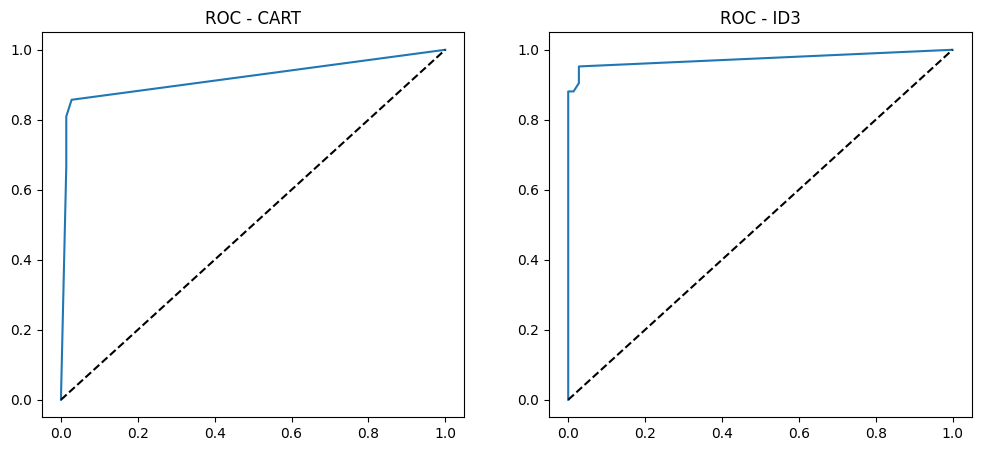

In [ ]:
fpr_cart, tpr_cart, _ = roc_curve(y_test, cart_prob)
fpr_id3, tpr_id3, _ = roc_curve(y_test, id3_prob)

fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].plot(fpr_cart, tpr_cart, label="CART")
ax[0].plot([0,1],[0,1],'k--')
ax[0].set_title("ROC - CART")

ax[1].plot(fpr_id3, tpr_id3, label="ID3")
ax[1].plot([0,1],[0,1],'k--')
ax[1].set_title("ROC - ID3")

plt.show()


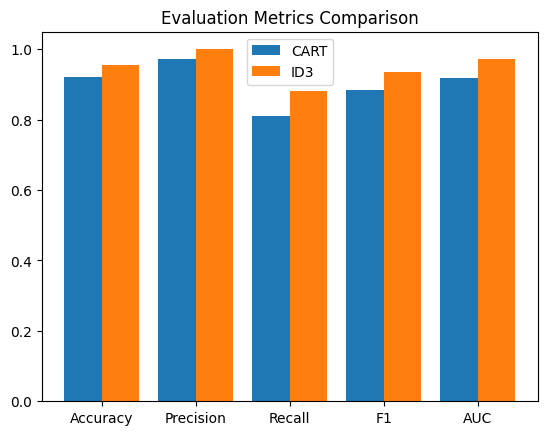

In [ ]:
metrics = ["Accuracy", "Precision", "Recall", "F1", "AUC"]
cart_scores = [
    accuracy_score(y_test, cart_pred),
    precision_score(y_test, cart_pred),
    recall_score(y_test, cart_pred),
    f1_score(y_test, cart_pred),
    roc_auc_score(y_test, cart_prob)
]
id3_scores = [
    accuracy_score(y_test, id3_pred),
    precision_score(y_test, id3_pred),
    recall_score(y_test, id3_pred),
    f1_score(y_test, id3_pred),
    roc_auc_score(y_test, id3_prob)
]
x = np.arange(len(metrics))
plt.bar(x-0.2, cart_scores, 0.4, label="CART")
plt.bar(x+0.2, id3_scores, 0.4, label="ID3")
plt.xticks(x, metrics)
plt.legend()
plt.title("Evaluation Metrics Comparison")
plt.show()


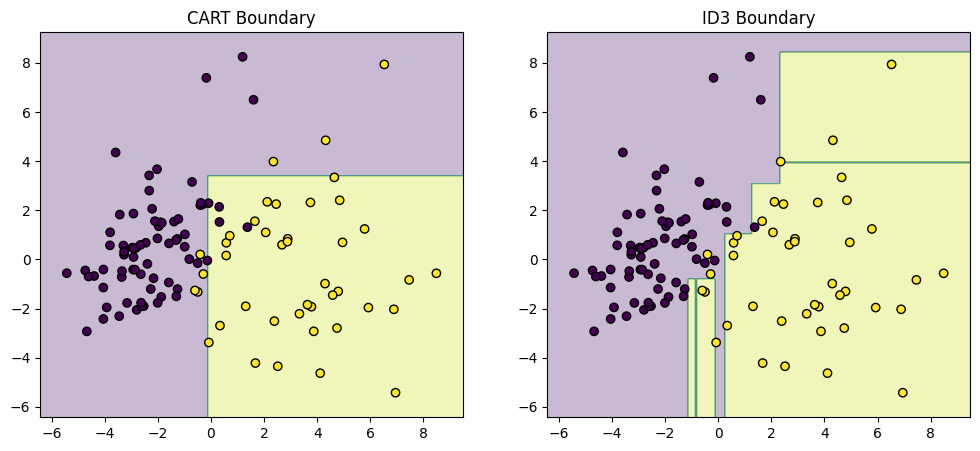

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
cart_pca = DecisionTreeClassifier(**grid_cart.best_params_, criterion="gini")
id3_pca = DecisionTreeClassifier(**grid_id3.best_params_, criterion="entropy")
cart_pca.fit(X_train_pca, y_train)
id3_pca.fit(X_train_pca, y_train)
def plot_boundary(model, X, y, ax, title):
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min,x_max,300),
                         np.linspace(y_min,y_max,300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:,0], X[:,1], c=y, edgecolor='k')
    ax.set_title(title)

fig, ax = plt.subplots(1,2,figsize=(12,5))
plot_boundary(cart_pca, X_test_pca, y_test, ax[0], "CART Boundary")
plot_boundary(id3_pca, X_test_pca, y_test, ax[1], "ID3 Boundary")
plt.show()


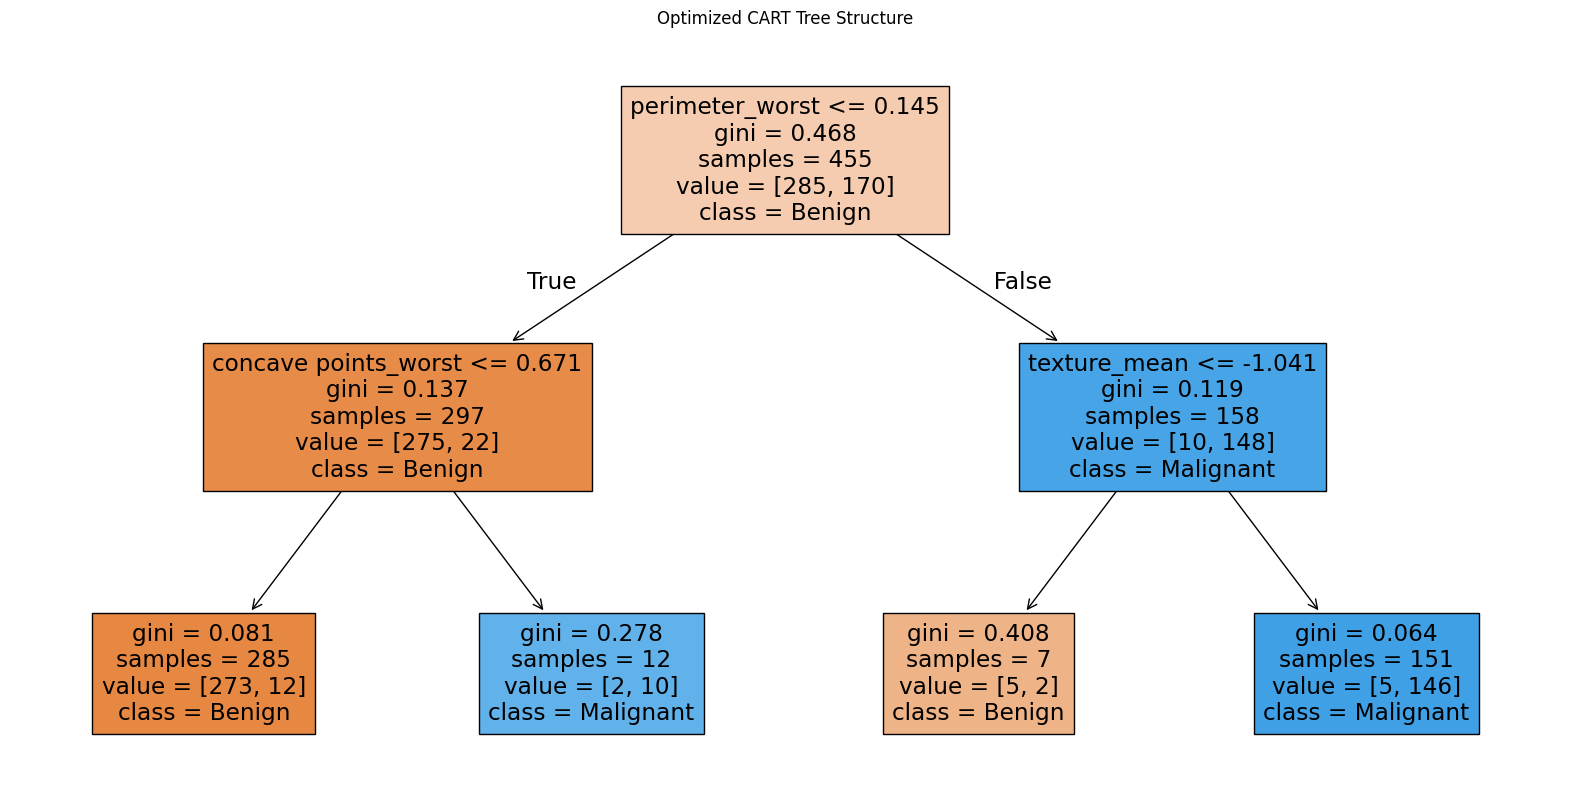

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(best_cart, feature_names=X.columns, class_names=["Benign","Malignant"],
          filled=True, max_depth=3)
plt.title("Optimized CART Tree Structure")
plt.show()
